# Convolution Neural Network on CIFAR10 data set

### Import all required libraries 

In [57]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils 
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

import  matplotlib.pyplot as plt
from itertools import cycle
plt.style.use('ggplot')
import seaborn as sns

from keras.datasets import cifar10

%matplotlib inline

### Importing the CIFAR-10 data set

In [28]:
(X, y), (X_test, y_test) = cifar10.load_data()

print(f"X size : {X.shape}")
print(f"X_test size : {X_test.shape}")

X size : (50000, 32, 32, 3)
X_test size : (10000, 32, 32, 3)


**Random sampling to reduce the training data set size**

In [32]:
X,_,y,_ = train_test_split(X, y, test_size=0.50, stratify=y ,random_state=70)

**Plot first few images**

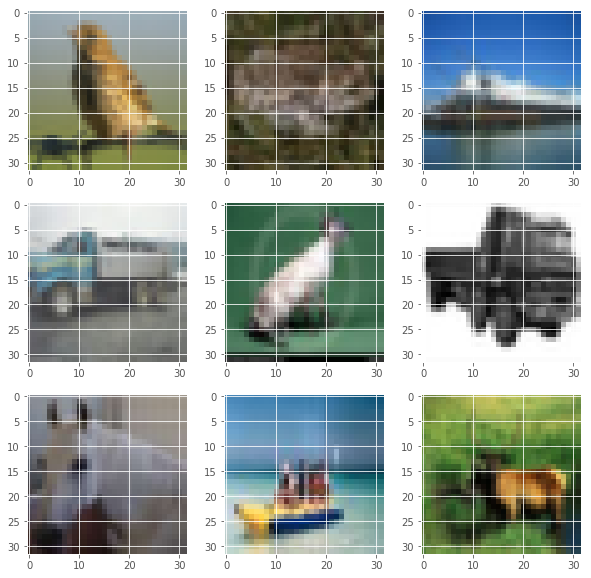

In [34]:
# plot first few images
fig,axes = plt.subplots(3,3,figsize=(10,10))
axs = axes.flatten()
for i in range(9):
    # define subplot
    #plt.subplot(330 + 2  + i)
    # plot raw pixel data
    axs[i].imshow(X[i])
# show the figure
plt.show()

### Normalization
Images are comprised of matrices of pixel values. Normally, pixels are expected to have values in the range of 0-255. We need to normalize these values to a range between 0 and 1.

In [36]:
X = X.astype('float32') 
X_test = X_test.astype('float32') 
X = X / 255.0 
X_test = X_test / 255.0

### Create Validation set

In [37]:
X_train,X_validation,y_train,y_validation = train_test_split(X, y, test_size=0.35, stratify=y ,random_state=42)

print(f"Train Size : {X_train.shape} | Validation Set : {X_validation.shape} | Test Set : {X_test.shape}")

Train Size : (16250, 32, 32, 3) | Validation Set : (8750, 32, 32, 3) | Test Set : (10000, 32, 32, 3)


### One-Hot Encoding

In [39]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)
y_validation = np_utils.to_categorical(y_validation)
num_classes = y_test.shape[1]

### Creating the Image Classification Model Using CNN

In [65]:
# Create the model 
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model_1.add(Dropout(0.2)) 
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model_1.add(MaxPooling2D(pool_size=(2, 2))) 
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model_1.add(Dropout(0.2)) 
model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model_1.add(MaxPooling2D(pool_size=(2, 2))) 
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model_1.add(Dropout(0.2)) 
model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model_1.add(MaxPooling2D(pool_size=(2, 2))) 
model_1.add(Flatten()) 
model_1.add(Dropout(0.2)) 
model_1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model_1.add(Dropout(0.2)) 
model_1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model_1.add(Dropout(0.2)) 
model_1.add(Dense(num_classes, activation='softmax'))

In [66]:
print(model_1.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_20 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_21 (Dropout)        (None, 16, 16, 64)        0         
                                                      

### Compiling the Model

In [67]:
# Compile model 
lrate = 0.01 
epochs=10
batch_size=128
decay = lrate/epochs 
sgd = tf.keras.optimizers.SGD(
    learning_rate=lrate,
    momentum=0.9,
    nesterov=False,
    name='SGD',
    )

model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Training the Image Classification Model

In [68]:
cnn_history=model_1.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size) 
model_1.save('cnn_model.h5')
# Final evaluation of the model 
test_scores = model_1.evaluate(X_test, y_test, verbose=0)
val_scores = model_1.evaluate(X_validation, y_validation, verbose=0)
print("Test Accuracy: %.2f%%" % (test_scores[1]*100))
print("Validation Accuracy: %.2f%%" % (val_scores[1]*100))

Epoch 1/10


W0425 10:28:22.523430 18088 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000002610053AF28> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
127/127 [==============================] - ETA: 0s - loss: 2.2184 - accuracy: 0.1654

W0425 10:29:48.386662 18088 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000026107CAA158> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
127/127 [==============================] - 92s 681ms/step - loss: 2.2184 - accuracy: 0.1654 - val_loss: 2.0637 - val_accuracy: 0.2501
Epoch 2/10
127/127 [==============================] - 91s 720ms/step - loss: 1.9809 - accuracy: 0.2727 - val_loss: 1.8945 - val_accuracy: 0.3152
Epoch 3/10
127/127 [==============================] - 97s 766ms/step - loss: 1.8102 - accuracy: 0.3404 - val_loss: 1.8553 - val_accuracy: 0.3334
Epoch 4/10
127/127 [==============================] - 92s 722ms/step - loss: 1.6717 - accuracy: 0.3861 - val_loss: 1.5988 - val_accuracy: 0.4187
Epoch 5/10
127/127 [==============================] - 97s 763ms/step - loss: 1.5895 - accuracy: 0.4154 - val_loss: 1.646

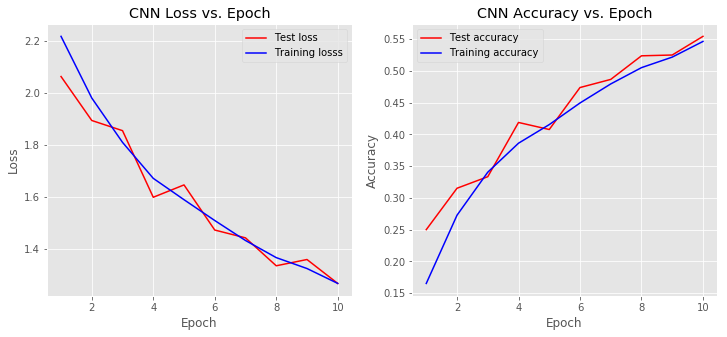

In [69]:
def plot_loss(history,ax,title):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    ax.plot(x, test_loss, color = 'red', label = 'Test loss')
    ax.plot(x, train_loss, color='blue',label = 'Training losss')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(title + ' Loss vs. Epoch')
    #plt.show()
    
def plot_accuracy(history,ax,title):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    ax.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    ax.plot(x, train_acc, color='blue',label = 'Training accuracy')
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.set_title(title +' Accuracy vs. Epoch')
    #plt.show()

fig,axs = plt.subplots(1,2,figsize=(12,5))
axs = axs.flatten()
plot_loss(cnn_history,axs[0],'CNN')   
plot_accuracy(cnn_history,axs[1],'CNN')   

### Train ResNet50 Model on CIFAR-10

In [50]:
#from keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50

from keras.callbacks import ReduceLROnPlateau

from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

resNet_model = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

model_2=Sequential()

#Add the Dense layers along with activation and batch normalization
model_2.add(resNet_model)
model_2.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_2.add(Dense(1024,activation=('relu'),input_dim=512))
model_2.add(Dropout(0.2)) 
model_2.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model_2.add(Dropout(0.2)) 
model_2.add(Dense(num_classes, activation='softmax'))

print(model_2.summary())

#Compile the model 

model_2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

resnet_history = model_2.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size) 
model_2.save('resnet_model.h5')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

W0424 16:31:25.582959 18088 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x0000026107080268> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
127/127 [==============================] - ETA: 0s - loss: 1.9154 - accuracy: 0.3620

W0424 16:45:16.216716 18088 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000261009B60D0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
127/127 [==============================] - 856s 7s/step - loss: 1.9154 - accuracy: 0.3620 - val_loss: 2.4959 - val_accuracy: 0.1335
Epoch 2/10
127/127 [==============================] - 7726s 61s/step - loss: 1.2060 - accuracy: 0.5799 - val_loss: 2.9308 - val_accuracy: 0.1000
Epoch 3/10
127/127 [==============================] - 786s 6s/step - loss: 0.8907 - accuracy: 0.6921 - val_loss: 2.7306 - val_accuracy: 0.1000
Epoch 4/10
127/127 [==============================] - 2110s 17s/step - loss: 0.6880 - accuracy: 0.7660 - val_loss: 3.3155 - val_accuracy: 0.1053
Epoch 5/10
127/127 [==============================] - 799s 6s/step - loss: 0.5306 - accuracy: 0.8177 - val_loss: 4.1931 - va

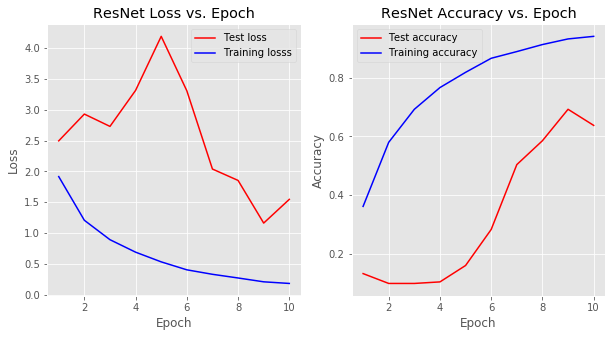

In [54]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.flatten()
plot_loss(resnet_history,axs[0],'ResNet')   
plot_accuracy(resnet_history,axs[1],'ResNet')   

### Models comparision and perfomance utilities

In [73]:
def model_predict(model,X):
    pred = model.predict(X)
    pred = [int(np.argmax(p)) for p in pred]
    return pred

def actual_label(y):
    actual = [int(np.argmax(l)) for l in y]
    return actual

def model_performance_score(model_result,model1_name='CNN',model2_name='ResNet'):
    actual = model_result['model1_actual']
    predicted_1 = model_result['model1_predicted']
    predicted_2 = model_result['model2_predicted']
    
    acc_score_1 = accuracy_score(actual,predicted_1)
    f1_1 = f1_score(actual,predicted_1,average='macro')
    precision_1 = precision_score(actual,predicted_1,average='macro')
    recall_1 = recall_score(actual,predicted_1,average='macro')
    
    acc_score_2 = accuracy_score(actual,predicted_2)
    f1_2 = f1_score(actual,predicted_2,average='macro')
    precision_2 = precision_score(actual,predicted_2,average='macro')
    recall_2 = recall_score(actual,predicted_2,average='macro')
    
    score_df = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'])
    score_df.loc[len(score_df)]=[acc_score_1,precision_1,recall_1,f1_1]
    score_df.loc[len(score_df)]=[acc_score_2,precision_2,recall_2,f1_2]
    
    score_df.index=[model1_name,model2_name]
    
    return score_df

def confusion_matrix_plots(model_result,title1='CNN',title2='ResNet'):
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    ax = axs.flatten()
    sns.heatmap(confusion_matrix(model_result['model1_actual'],model_result['model1_predicted'],normalize='true'),annot=True,cmap="YlGnBu",fmt='g',ax=ax[0])
    sns.heatmap(confusion_matrix(model_result['model2_actual'],model_result['model2_predicted'],normalize='true'),annot=True,cmap="YlGnBu",fmt='g',ax=ax[1])
    
    ax[0].set_title(f"Confusion Matrix for {title1}")
    ax[1].set_title(f"Confusion Matrix for {title2}")
    
    ax[0].set_xlabel('Classes')
    ax[1].set_xlabel('Classes')
    
    ax[0].set_ylabel('Classes')
    ax[1].set_ylabel('Classes')
    plt.show()
    
def roc_plot(model1,model2,X_test,y_test,n_classes=10,title1='CNN',title2='ResNet'):
    y_score = model1.predict(X_test)
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    ax = axs.flatten()
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green','orange','yellow','pink'])
    for i, color in zip(range(n_classes), colors):
        ax[0].plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    ax[0].plot([0, 1], [0, 1], 'k--', lw=1.5)
    ax[0].set_xlim([-0.05, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(f'ROC for {title1}')
    ax[0].legend(loc="lower right")
    
    y_score2 = model2.predict(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score2[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green','orange','yellow','pink'])
    for i, color in zip(range(n_classes), colors):
        ax[1].plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    ax[1].plot([0, 1], [0, 1], 'k--', lw=1.5)
    ax[1].set_xlim([-0.05, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC for {title2}')
    ax[1].legend(loc="lower right")
    
    plt.show()
    
def classification_report_plots(model_result,n_classes=10,title1='CNN',title2='ResNet'):
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    ax = axs.flatten()
    clf_rpt1 = classification_report(model_result['model1_actual'],model_result['model1_predicted'],
                                    labels=list(range(n_classes)),
                                    target_names=list(range(n_classes)),
                                    output_dict=True)
    clf_rpt1 = pd.DataFrame(clf_rpt1).iloc[:-1, :].T
    
    clf_rpt2 = classification_report(model_result['model2_actual'],model_result['model2_predicted'],
                                    labels=list(range(n_classes)),
                                    target_names=list(range(n_classes)),
                                    output_dict=True)
    clf_rpt2 = pd.DataFrame(clf_rpt2).iloc[:-1, :].T
    
    sns.heatmap(clf_rpt1,annot=True,fmt='g',ax=ax[0],cbar=False)
    sns.heatmap(clf_rpt2,annot=True,fmt='g',ax=ax[1],cbar=False)
    
    ax[0].set_title(f" Classification Report for {title1}")
    ax[1].set_title(f" Classification Report for {title2}")
    
    plt.show()

In [70]:
predicted_1 = model_predict(model_1,X_test)
predicted_2 = model_predict(model_2,X_test)
actual = actual_label(y_test)

model_result = {'model1_actual':actual,'model1_predicted':predicted_1,
               'model2_actual':actual,'model2_predicted':predicted_2}

W0425 18:10:26.654009 18088 ag_logging.py:142] AutoGraph could not transform <function Model.make_predict_function.<locals>.predict_function at 0x000002610771C268> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [71]:
model_performance_score(model_result)

,Accuracy,Precision,Recall,F1
CNN,0.5493,0.555608,0.5493,0.544463
ResNet,0.6333,0.671048,0.6333,0.628126


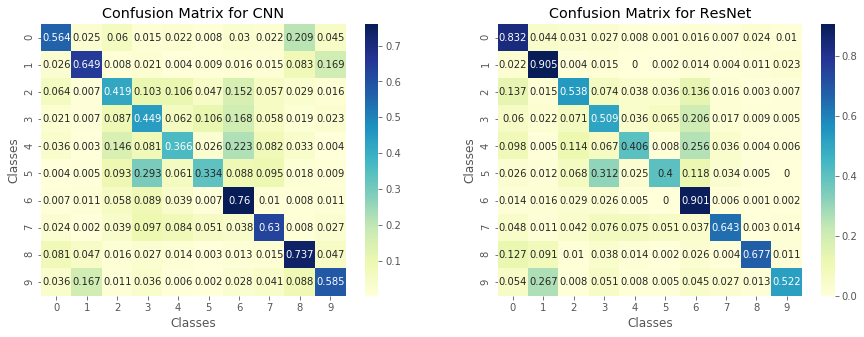

In [72]:
confusion_matrix_plots(model_result)

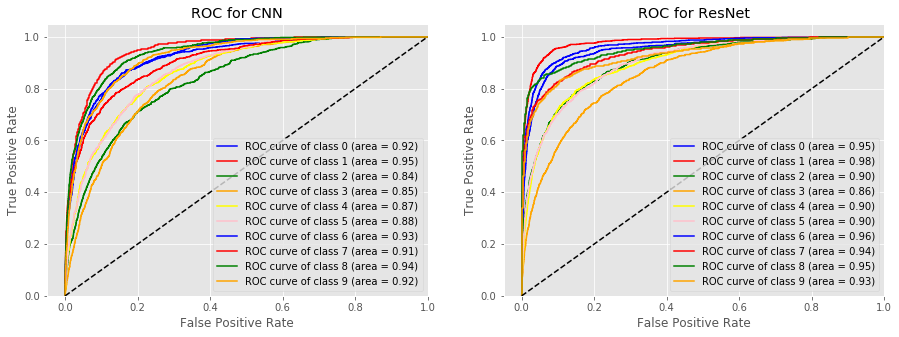

In [63]:
roc_plot(model_1,model_2,X_test,y_test)

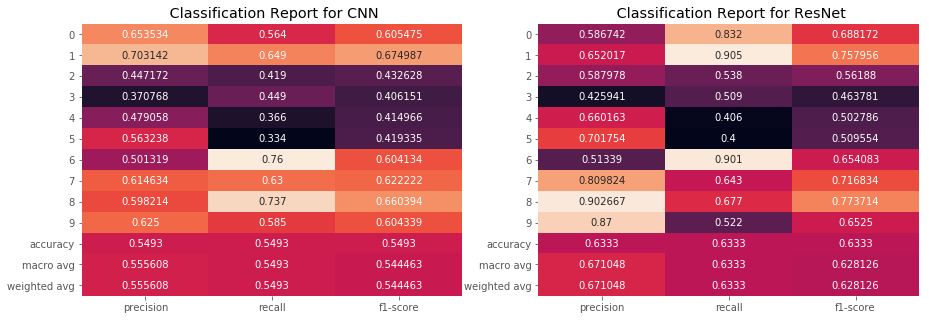

In [74]:
classification_report_plots(model_result)